In [1]:
# 다중선형회귀모델
import tensorflow as tf
from keras.models import Sequential  # 순차적으로 층을 쌓는 모델
from keras.layers import Dense, Input  # 완전연결층(Dense), 입력 정의(Input)
from keras import optimizers  # 옵티마이저 구성에 사용 (예: SGD, Adam)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 5명의 3회 시험 점수로 모의고사 후 본고사 점수 데이터로 학습 후 새 데이터로 점수 예측
x_data = np.array([[70,85,80],[71,89,78],[50,80,60],[66,30,60],[50,25,10]])
y_data = np.array([73,82,72,57,34])

# 방법 1 Sequential
model = Sequential()  # Sequential API로 순차 모델 생성
model.add(Input(shape=(3,)))  # 입력 특성 3개(배치차원 제외)
model.add(Dense(units=8, activation='relu', name='a'))  # 은닉층: 유닛 8, ReLU 활성화
model.add(Dense(units=4, activation='relu', name='b'))  # 은닉층: 유닛 4, ReLU 활성화
model.add(Dense(units=1, activation='linear', name='c'))  # 출력층: 회귀이므로 선형(Linear)
print(model.summary())

opti = optimizers.Adam(learning_rate=0.001)  # Adam 옵티마이저, 학습률 0.001
model.compile(optimizer=opti, loss='mse', metrics=['mse'])  # 손실:MSE(회귀), 지표:MSE
history = model.fit(x_data, y_data, batch_size=1, epochs=50, verbose=0)  # 배치1, 50에폭, 로그출력 끔

# plt.plot(history.history['loss'], 'r--')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.show()

loss_metrics = model.evaluate(x_data, y_data)  # [손실, 지표] 반환(MSE 설정 시 [loss, mse])
print('loss_metrics : ', loss_metrics)  # 평가 결과 출력
from sklearn.metrics import r2_score  # 결정계수(R^2) 계산 함수
print('결정계수 : ', r2_score(y_data, model.predict(x_data)))  # 실제값 vs 예측값 R^2

2025-09-11 17:37:03.078408: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-11 17:37:03.078601: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-11 17:37:03.078628: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-11 17:37:03.079054: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-11 17:37:03.079071: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ a (Dense)                       │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ b (Dense)                       │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ c (Dense)                       │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

None


2025-09-11 17:37:03.539738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 98.9781 - mse: 98.9781
loss_metrics :  [98.97807312011719, 98.97807312011719]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
결정계수 :  0.6507970690727234


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 24.1917 - mse: 24.1917
loss_metrics :  [24.19168472290039, 24.19168472290039]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
결정계수 :  0.9146497249603271


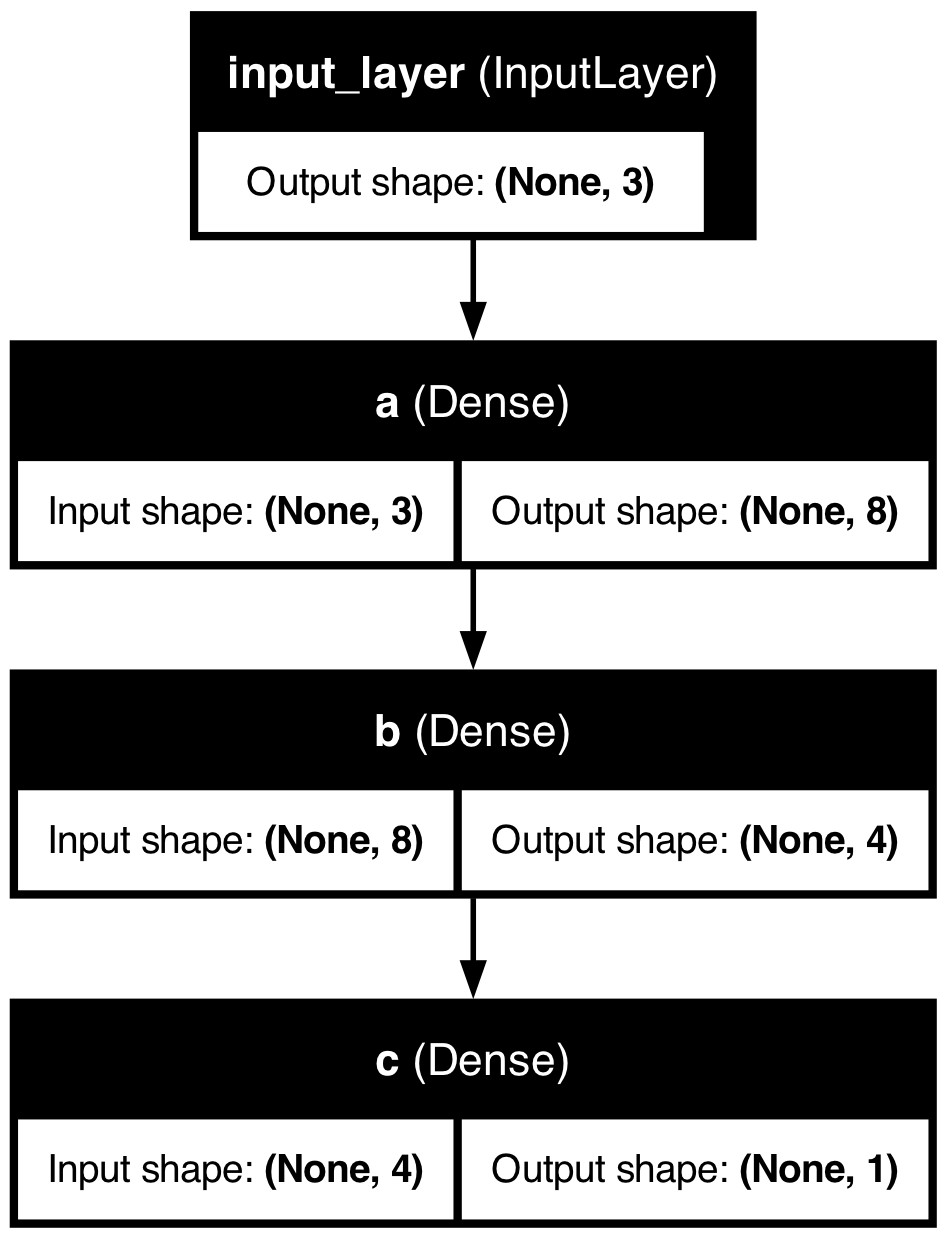

In [3]:
import tensorflow as tf
from keras.models import Sequential  # 순차적으로 층을 쌓는 모델
from keras.layers import Dense, Input  # 완전연결층(Dense), 입력 정의(Input)
from keras import optimizers  # 옵티마이저 구성에 사용 (예: SGD, Adam)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import shutil, os, datetime as dt

from keras.models import Model
from keras.callbacks import TensorBoard

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# 방법 2 Functional api
x_data = np.array([[70,85,80],[71,89,78],[50,80,60],[66,30,60],[50,25,10]])
y_data = np.array([73,82,72,57,34])

inputs = Input(shape=(3,))  # 입력 3차원(특성 3)
h1 = Dense(units=8, activation='relu', name='a')(inputs)  # 은닉층 8, ReLU
h2 = Dense(units=4, activation='relu', name='b')(h1)  # 은닉층 4, ReLU
outputs = Dense(units=1, activation='linear', name='c')(h2)  # 출력층 1, Linear

model = Model(inputs, outputs, name='linear_model')

# TensorBoard --------------
Base = "logs" # 기본 로그 저장 디렉토리명
shutil.rmtree(Base, ignore_errors=True) # 해당 디렉토리 삭제
RUN = os.path.join(Base, 'test')
os.makedirs(RUN, exist_ok=True)

tb = TensorBoard(log_dir=RUN, histogram_freq=1, write_graph=True)  # 텐서보드: 로그 디렉토리/히스토그램/그래프 기록
# --------------------------

opti = optimizers.Adam(learning_rate=0.001)  # Adam(0.001)
model.compile(optimizer=opti, loss='mse', metrics=['mse'])  # 회귀용 MSE
model.fit(x=x_data, y=y_data, batch_size=1, epochs=100, verbose=0, callbacks=[tb])  # 텐서보드 콜백 등록

loss_metrics = model.evaluate(x_data, y_data)  # 학습 데이터에 대한 [loss, mse] 평가
print('loss_metrics : ', loss_metrics)
from sklearn.metrics import r2_score  # R^2(설명력) 계산
print('결정계수 : ', r2_score(y_data, model.predict(x_data)))

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)  # 모델 구조 이미지 저장(텐서/레이어명 표시)

In [6]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 32540), started 0:00:36 ago. (Use '!kill 32540' to kill it.)